<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-04-19 02:35:33--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
connected. to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... 
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  58.0MB/s    in 2.6s    

2025-04-19 02:35:36 (58.0 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data


In [5]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [6]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.




--- Generating: Stacked Bar - Median JobSatPoints_6 & 7 by Age ---
Using 29373 rows with valid Age and both JobSatPoints.

Median Job Satisfaction Scores by Age Group:
                    JobSatPoints_6  JobSatPoints_7
Age                                               
Under 18 years old             1.5             5.0
18-24 years old               15.0            20.0
25-34 years old               20.0            15.0
35-44 years old               20.0            15.0
45-54 years old               20.0            15.0
55-64 years old               20.0            20.0
65 years or older             20.0            15.0


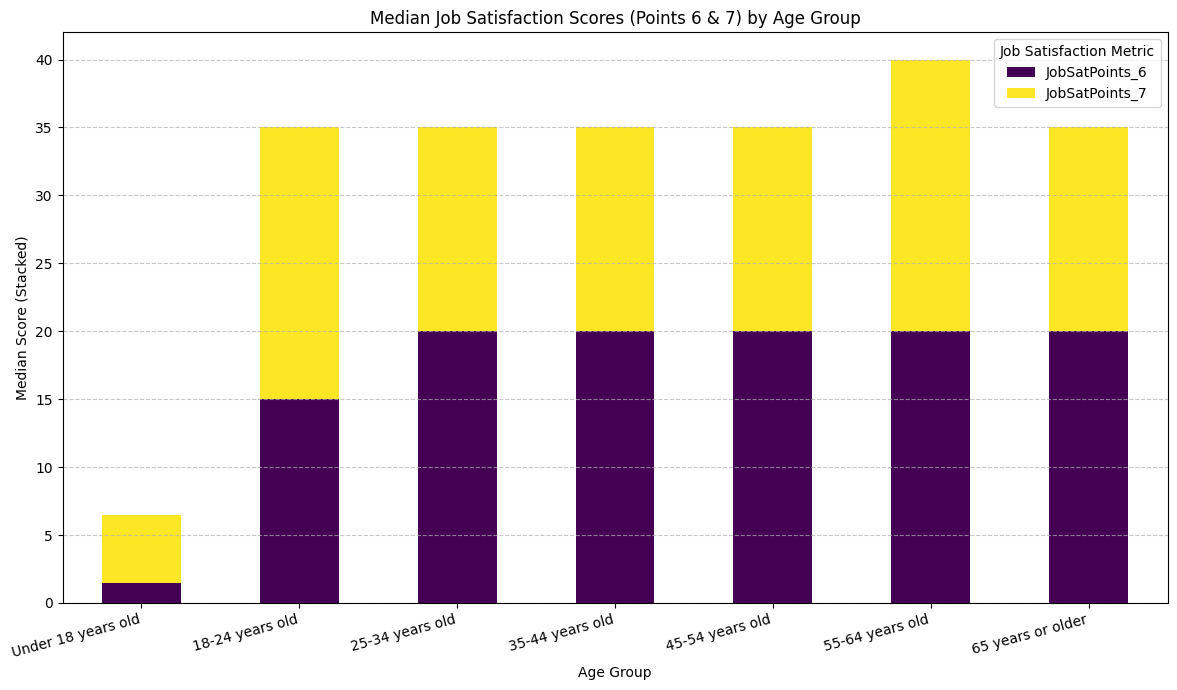

In [7]:
##Write your code here
# Define age order (if not already defined)
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'
]

# --- Stacked Bar Chart of Median JobSatPoints_6 & JobSatPoints_7 by Age ---
print("\n--- Generating: Stacked Bar - Median JobSatPoints_6 & 7 by Age ---")

sat_col_6 = 'JobSatPoints_6'
sat_col_7 = 'JobSatPoints_7'
age_col = 'Age'

if age_col in df.columns and sat_col_6 in df.columns and sat_col_7 in df.columns:

    # 1. Prepare Data
    data_sat_age = df[[age_col, sat_col_6, sat_col_7]].copy()

    # Ensure numeric types (redundant but safe)
    data_sat_age[sat_col_6] = pd.to_numeric(data_sat_age[sat_col_6], errors='coerce')
    data_sat_age[sat_col_7] = pd.to_numeric(data_sat_age[sat_col_7], errors='coerce')

    # Clean Age and filter valid groups, make categorical
    data_sat_age = data_sat_age[data_sat_age[age_col].isin(age_order)]
    data_sat_age[age_col] = pd.Categorical(data_sat_age[age_col], categories=age_order, ordered=True)

    # Drop rows missing any of the relevant data points
    data_sat_age.dropna(subset=[age_col, sat_col_6, sat_col_7], inplace=True)
    print(f"Using {len(data_sat_age)} rows with valid Age and both JobSatPoints.")

    # 2. Calculate Medians for each age group
    # Use observed=False if you want to ensure all age categories appear (even with NaN median if no data)
    median_scores = data_sat_age.groupby(age_col, observed=False)[[sat_col_6, sat_col_7]].median()

    # Ensure the index follows the desired age order
    median_scores = median_scores.reindex(age_order)

    print("\nMedian Job Satisfaction Scores by Age Group:")
    print(median_scores)

    # Check if data remains after grouping
    if median_scores.isnull().all().all(): # Check if all values are NaN
         print("Error: No valid median data calculated. Cannot generate plot.")
    elif median_scores.dropna(how='all').empty: # Check if all rows have at least one NaN
         print("Warning: Some age groups might have missing median values.")
    # Proceed to plot even if some NaNs exist, plot function might handle them

    # 3. Create the Stacked Bar Chart using Pandas plotting
    if not median_scores.isnull().all().all():
        ax = median_scores.plot(kind='bar', stacked=True, figsize=(12, 7),
                                colormap='viridis') # Choose a colormap

        # 4. Customize the Plot
        plt.title('Median Job Satisfaction Scores (Points 6 & 7) by Age Group')
        plt.xlabel('Age Group')
        plt.ylabel('Median Score (Stacked)') # Clarify that y-axis represents stacked medians
        plt.xticks(rotation=15, ha='right')
        plt.legend(title='Job Satisfaction Metric')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
    else:
         # Already printed error message above
         pass

else:
    print(f"Stacked chart skipped: Required columns '{age_col}', '{sat_col_6}', or '{sat_col_7}' not found.")

##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.



--- Generating: Stacked Bar - Median JobSatPoints_6 & 7 by Employment Status ---
Using 29424 rows with valid Employment Status and both JobSatPoints.

Median Job Satisfaction Scores by Employment Status:
                                                    JobSatPoints_6  \
Employment                                                           
Employed, full-time;Not employed, but looking f...           100.0   
Employed, full-time;Student, full-time;Not empl...            89.0   
Employed, full-time;Student, full-time;Not empl...            85.0   
Employed, part-time;Retired                                   70.0   
Student, full-time;Independent contractor, free...            70.0   
...                                                            ...   
Independent contractor, freelancer, or self-emp...             0.0   
Not employed, but looking for work;Independent ...             0.0   
Not employed, but looking for work;Independent ...             0.0   
Not employed, but looking

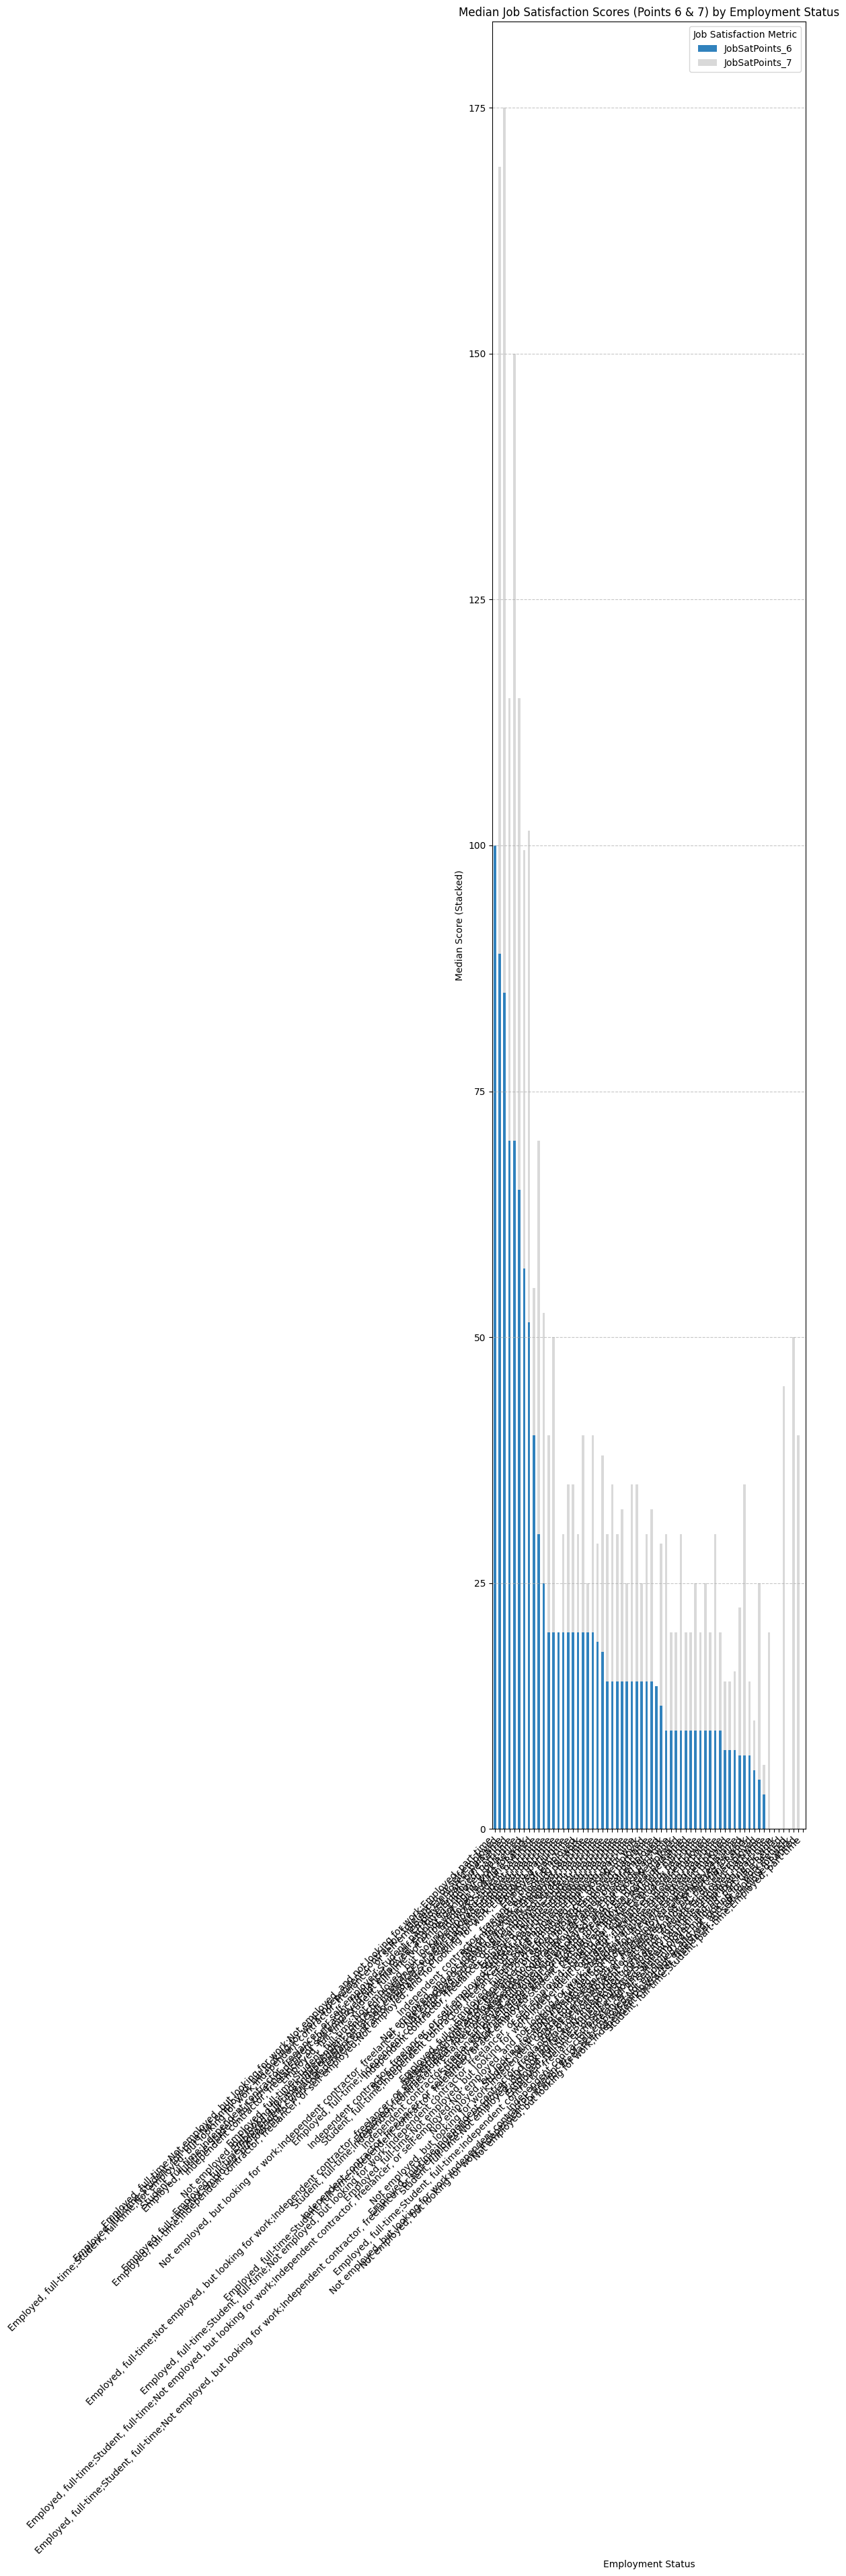

In [8]:
##Write your code here
# --- Stacked Bar Chart of Median JobSatPoints_6 & JobSatPoints_7 by Employment Status ---
print("\n--- Generating: Stacked Bar - Median JobSatPoints_6 & 7 by Employment Status ---")

sat_col_6 = 'JobSatPoints_6'
sat_col_7 = 'JobSatPoints_7'
employment_col = 'Employment'

if employment_col in df.columns and sat_col_6 in df.columns and sat_col_7 in df.columns:

    # 1. Prepare Data
    data_sat_emp = df[[employment_col, sat_col_6, sat_col_7]].copy()

    # Ensure numeric types (redundant but safe)
    data_sat_emp[sat_col_6] = pd.to_numeric(data_sat_emp[sat_col_6], errors='coerce')
    data_sat_emp[sat_col_7] = pd.to_numeric(data_sat_emp[sat_col_7], errors='coerce')

    # Clean Employment Status column
    data_sat_emp[employment_col] = data_sat_emp[employment_col].astype(str).str.strip()
    # Remove potential 'nan' strings
    data_sat_emp = data_sat_emp[data_sat_emp[employment_col].str.lower() != 'nan']

    # Drop rows missing any of the relevant data points after cleaning employment status
    data_sat_emp.dropna(subset=[employment_col, sat_col_6, sat_col_7], inplace=True)
    print(f"Using {len(data_sat_emp)} rows with valid Employment Status and both JobSatPoints.")

    # 2. Calculate Medians for each employment status
    # Group by the cleaned employment status column
    median_scores_emp = data_sat_emp.groupby(employment_col)[[sat_col_6, sat_col_7]].median()

    # Optional: Sort the employment statuses for potentially better presentation
    # For example, sort by the median JobSatPoints_6
    median_scores_emp = median_scores_emp.sort_values(by=sat_col_6, ascending=False)

    print("\nMedian Job Satisfaction Scores by Employment Status:")
    print(median_scores_emp)

    # Check if data remains after grouping
    if median_scores_emp.isnull().all().all(): # Check if all values are NaN
         print("Error: No valid median data calculated. Cannot generate plot.")
    elif median_scores_emp.dropna(how='all').empty: # Check if all rows have at least one NaN
         print("Warning: Some employment statuses might have missing median values.")

    # 3. Create the Stacked Bar Chart using Pandas plotting
    if not median_scores_emp.isnull().all().all():
        # Dynamically adjust figure height based on number of categories
        num_categories = len(median_scores_emp)
        fig_height = max(6, num_categories * 0.6) # Ensure a minimum height
        fig_width = 12

        ax = median_scores_emp.plot(kind='bar', stacked=True, figsize=(fig_width, fig_height),
                                    colormap='tab20c') # Choose a colormap (tab20c is good for categories)

        # 4. Customize the Plot
        plt.title('Median Job Satisfaction Scores (Points 6 & 7) by Employment Status')
        plt.xlabel('Employment Status')
        plt.ylabel('Median Score (Stacked)') # Clarify stacked nature
        plt.xticks(rotation=45, ha='right') # Rotate labels if many categories
        plt.legend(title='Job Satisfaction Metric')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout() # Adjust layout to prevent labels overlapping
        plt.show()
    else:
        # Error message already printed
        pass

else:
    print(f"Stacked chart skipped: Required columns '{employment_col}', '{sat_col_6}', or '{sat_col_7}' not found.")

### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.



--- Generating: Stacked Bar - Median Compensation & JobSatPoints_6 by Age ---
Using 16177 rows with valid Age, Compensation, and JobSatPoints_6.

Median Compensation and Job Satisfaction (Points 6) by Age Group:
                    ConvertedCompYearly  JobSatPoints_6
Age                                                    
Under 18 years old               8661.0            10.0
18-24 years old                 25735.0            20.0
25-34 years old                 59872.0            20.0
35-44 years old                 85925.0            20.0
45-54 years old                100900.5            20.0
55-64 years old                119189.5            20.0
65 years or older              121668.0            20.0


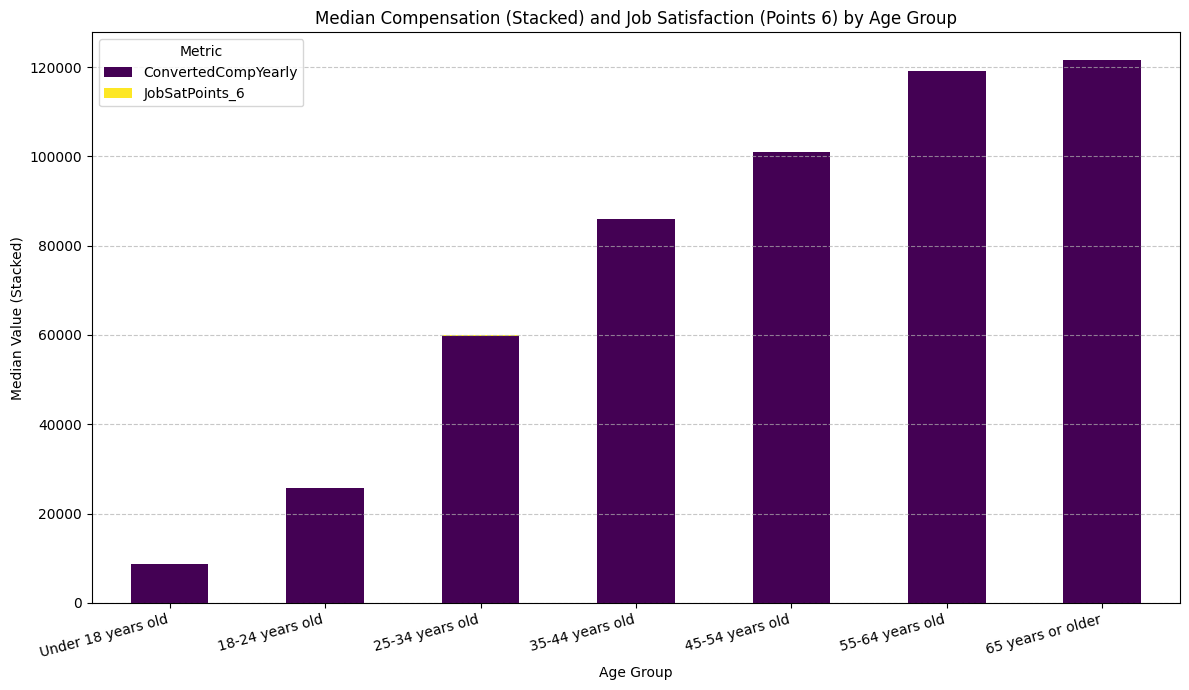

In [10]:
# Define age order (reuse from Task 1)
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'
]

#--------------------------------------------------------------------------
# Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group
#--------------------------------------------------------------------------
print("\n--- Generating: Stacked Bar - Median Compensation & JobSatPoints_6 by Age ---")

# Define column names
age_col = 'Age'
comp_col = 'ConvertedCompYearly'
sat_col_6 = 'JobSatPoints_6'

# Check if required columns exist
if age_col in df.columns and comp_col in df.columns and sat_col_6 in df.columns:

    # 1. Prepare Data
    data_comp_sat = df[[age_col, comp_col, sat_col_6]].copy()

    # Ensure numeric types
    data_comp_sat[comp_col] = pd.to_numeric(data_comp_sat[comp_col], errors='coerce')
    data_comp_sat[sat_col_6] = pd.to_numeric(data_comp_sat[sat_col_6], errors='coerce')

    # Clean Age and filter valid groups, make categorical
    data_comp_sat = data_comp_sat[data_comp_sat[age_col].isin(age_order)]
    data_comp_sat[age_col] = pd.Categorical(data_comp_sat[age_col], categories=age_order, ordered=True)

    # Drop rows missing any of the relevant data points
    data_comp_sat.dropna(subset=[age_col, comp_col, sat_col_6], inplace=True)
    print(f"Using {len(data_comp_sat)} rows with valid Age, Compensation, and JobSatPoints_6.")

    # 2. Calculate Medians for each age group
    median_comp_sat = data_comp_sat.groupby(age_col, observed=False)[[comp_col, sat_col_6]].median()

    # Ensure the index follows the desired age order (redundant due to Categorical, but safe)
    median_comp_sat = median_comp_sat.reindex(age_order)

    print("\nMedian Compensation and Job Satisfaction (Points 6) by Age Group:")
    print(median_comp_sat)

    # Check if data remains after grouping
    if median_comp_sat.isnull().all().all():
        print("Error: No valid median data calculated. Cannot generate plot.")
    elif median_comp_sat.dropna(how='all').empty:
        print("Warning: Some age groups might have missing median values.")
    # Proceed to plot even if some NaNs exist

    # 3. Create the Stacked Bar Chart using Pandas plotting
    if not median_comp_sat.isnull().all().all():
        # Note: Stacking Compensation (often large values) and Satisfaction (small values)
        # might make the satisfaction part hard to see. Normalization or separate plots
        # might be better, but we'll follow the task request.
        ax = median_comp_sat.plot(kind='bar', stacked=True, figsize=(12, 7),
                                  colormap='viridis') # Choose a colormap

        # 4. Customize the Plot
        plt.title('Median Compensation (Stacked) and Job Satisfaction (Points 6) by Age Group')
        plt.xlabel('Age Group')
        plt.ylabel('Median Value (Stacked)') # Label is generic due to different scales
        plt.xticks(rotation=15, ha='right')
        plt.legend(title='Metric')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
    else:
        # Error message already printed
        pass

else:
    print(f"Stacked chart skipped: Required columns '{age_col}', '{comp_col}', or '{sat_col_6}' not found.")

##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


In [ ]:
##Write your code here

### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.



--- Generating: Stacked Bar - Proportion of Top 10 Preferred Databases by Age ---

Top 10 databases respondents want to work with: ['PostgreSQL', 'SQLite', 'MySQL', 'MongoDB', 'Redis', 'Microsoft SQL Server', 'Elasticsearch', 'MariaDB', 'Dynamodb', 'Supabase']
Using 97846 entries corresponding to top 10 databases.

Proportion of Top 10 Preferred Databases within Each Age Group:
DatabaseWantToWorkWith  Dynamodb  Elasticsearch   MariaDB  \
Age                                                         
Under 18 years old      0.010509       0.020614  0.062247   
18-24 years old         0.027460       0.050506  0.057708   
25-34 years old         0.040599       0.071618  0.052774   
35-44 years old         0.041107       0.071817  0.063248   
45-54 years old         0.033839       0.062148  0.077007   

DatabaseWantToWorkWith  Microsoft SQL Server   MongoDB     MySQL  PostgreSQL  \
Age                                                                            
Under 18 years old            

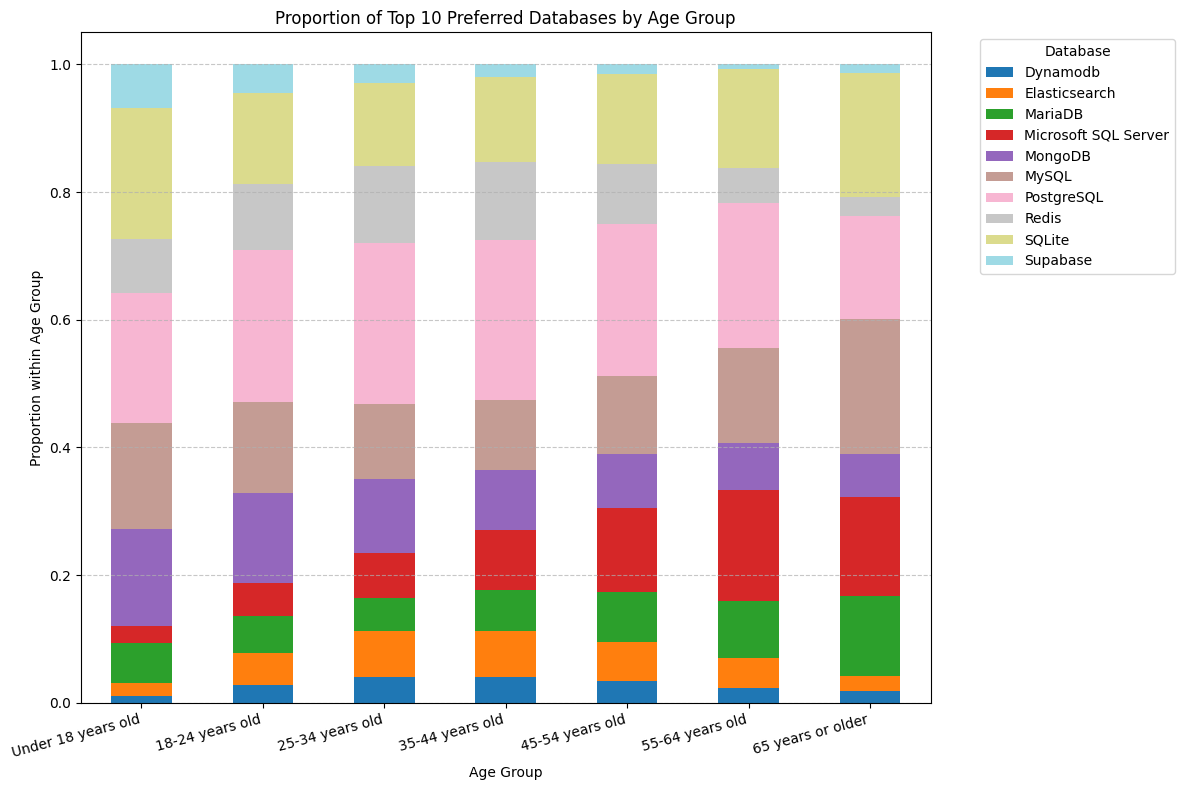

In [11]:
##Write your code here
print("\n--- Generating: Stacked Bar - Proportion of Top 10 Preferred Databases by Age ---")

# Define column names
age_col = 'Age'
db_want_col = 'DatabaseWantToWorkWith'

# Check if required columns exist
if age_col in df.columns and db_want_col in df.columns:

    # 1. Prepare Data
    # Drop rows where Age or the database preference is missing
    data_db_age = df[[age_col, db_want_col]].dropna().copy()

    # Clean Age and filter valid groups, make categorical
    data_db_age = data_db_age[data_db_age[age_col].isin(age_order)]
    data_db_age[age_col] = pd.Categorical(data_db_age[age_col], categories=age_order, ordered=True)

    # Parse the multi-value database column
    # Split the string by semicolon, create a list
    # Explode the list into separate rows
    # Strip whitespace from database names
    data_db_age[db_want_col] = data_db_age[db_want_col].str.split(';')
    data_db_age_exploded = data_db_age.explode(db_want_col)
    data_db_age_exploded[db_want_col] = data_db_age_exploded[db_want_col].str.strip()

    # Find the overall top 10 most wanted databases
    top_10_dbs = data_db_age_exploded[db_want_col].value_counts().nlargest(10).index.tolist()
    print(f"\nTop 10 databases respondents want to work with: {top_10_dbs}")

    # Filter the exploded data to include only the top 10 databases
    data_db_age_top10 = data_db_age_exploded[data_db_age_exploded[db_want_col].isin(top_10_dbs)]
    print(f"Using {len(data_db_age_top10)} entries corresponding to top 10 databases.")

    # 2. Calculate Counts and Proportions
    # Group by Age and Database, count occurrences
    db_counts = data_db_age_top10.groupby([age_col, db_want_col], observed=False).size()

    # Unstack to get Databases as columns
    db_counts_pivot = db_counts.unstack(fill_value=0)

    # Ensure index order (redundant but safe)
    db_counts_pivot = db_counts_pivot.reindex(age_order)

    # Calculate proportions within each age group (each row sums to 1)
    db_proportions = db_counts_pivot.apply(lambda x: x / x.sum(), axis=1)

    print("\nProportion of Top 10 Preferred Databases within Each Age Group:")
    print(db_proportions.head()) # Print head to avoid large output

    # Check if data remains
    if db_proportions.isnull().all().all():
        print("Error: No valid proportion data calculated. Cannot generate plot.")
    elif db_proportions.empty:
         print("Error: No data available after filtering for top databases. Cannot generate plot.")
    # Proceed to plot

    # 3. Create the Stacked Bar Chart
    if not db_proportions.empty and not db_proportions.isnull().all().all():
        ax = db_proportions.plot(kind='bar', stacked=True, figsize=(14, 8),
                                 colormap='tab20') # Colormap good for categorical data

        # 4. Customize the Plot
        plt.title('Proportion of Top 10 Preferred Databases by Age Group')
        plt.xlabel('Age Group')
        plt.ylabel('Proportion within Age Group')
        plt.xticks(rotation=15, ha='right')
        # Place legend outside the plot
        plt.legend(title='Database', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for legend
        plt.show()
    else:
        # Error message already printed or implicit in empty check
        pass

else:
    print(f"Stacked chart skipped: Required columns '{age_col}' or '{db_want_col}' not found.")

##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.



--- Generating: Stacked Bar - Distribution of Employment Type by Job Satisfaction Level ---
Using 29450 rows with valid Employment and JobSatPoints_6.

Focusing on Top 10 Employment Types: ['Employed, full-time', 'Employed, full-time;Independent contractor, freelancer, or self-employed', 'Independent contractor, freelancer, or self-employed', 'Employed, part-time', 'Employed, full-time;Student, part-time', 'Employed, full-time;Student, full-time', 'Student, full-time;Employed, part-time', 'Student, part-time;Employed, part-time', 'Independent contractor, freelancer, or self-employed;Employed, part-time', 'Employed, full-time;Employed, part-time']
Using 28820 entries from top 10 employment types.

Proportion of Top 10 Employment Types within Each Job Satisfaction Category:
Employment      Employed, full-time  Employed, full-time;Employed, part-time  \
SatCategory                                                                    
Low (0-30)                 0.788474                     

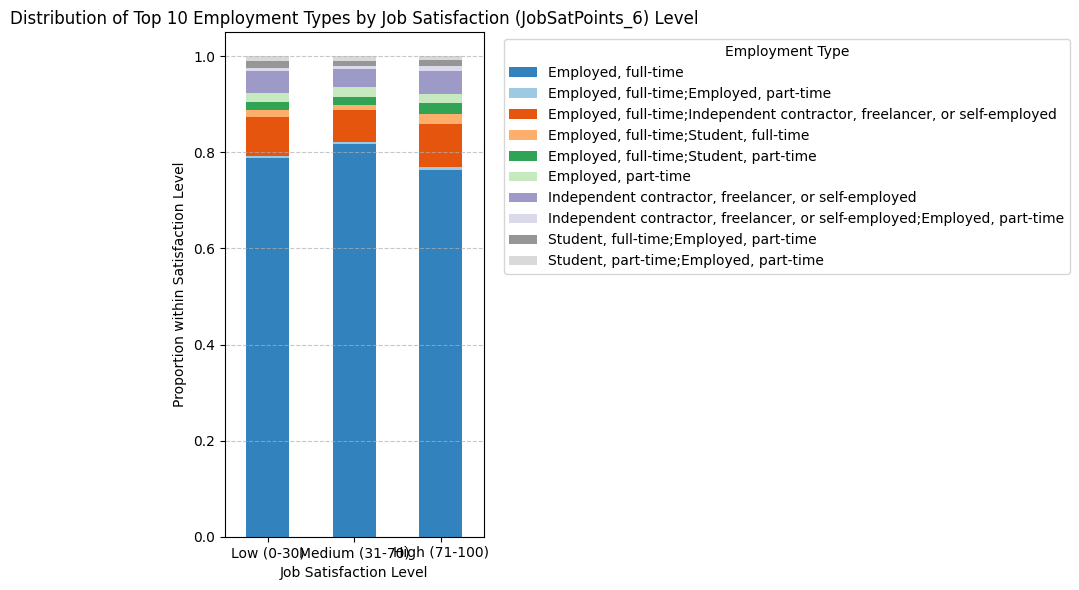

In [12]:
##Write your code here
print("\n--- Generating: Stacked Bar - Distribution of Employment Type by Job Satisfaction Level ---")

# Define column names
emp_col = 'Employment'
# Using JobSatPoints_6 as the satisfaction metric, could use another
sat_col = 'JobSatPoints_6'

# Check if required columns exist
if emp_col in df.columns and sat_col in df.columns:

    # 1. Prepare Data
    data_emp_sat = df[[emp_col, sat_col]].copy()

    # Clean Employment Status column (similar to Task 1.2)
    data_emp_sat[emp_col] = data_emp_sat[emp_col].astype(str).str.strip()
    # Remove potential 'nan' strings if they resulted from astype(str)
    data_emp_sat = data_emp_sat[data_emp_sat[emp_col].str.lower() != 'nan']
    # Optional: Shorten long employment strings if needed, or increase plot size later

    # Ensure numeric type for satisfaction score
    data_emp_sat[sat_col] = pd.to_numeric(data_emp_sat[sat_col], errors='coerce')

    # Drop rows missing either cleaned employment or numeric satisfaction
    data_emp_sat.dropna(subset=[emp_col, sat_col], inplace=True)
    print(f"Using {len(data_emp_sat)} rows with valid Employment and {sat_col}.")

    # 2. Bin Job Satisfaction Scores
    # Define bins and labels for satisfaction levels
    # Adjust bins based on the distribution of JobSatPoints_6 (seems 0-100 based on earlier tasks?)
    sat_bins = [-1, 30, 70, 101] # Bins: <=30 (Low), 31-70 (Medium), 71-100 (High)
    sat_labels = ['Low (0-30)', 'Medium (31-70)', 'High (71-100)']
    data_emp_sat['SatCategory'] = pd.cut(data_emp_sat[sat_col], bins=sat_bins, labels=sat_labels, right=True)

    # Drop rows where satisfaction couldn't be binned (e.g., NaN after pd.cut)
    data_emp_sat.dropna(subset=['SatCategory'], inplace=True)

    # Optional: Filter for most common employment types if too many exist
    top_emp_types = data_emp_sat[emp_col].value_counts().nlargest(10).index.tolist()
    print(f"\nFocusing on Top 10 Employment Types: {top_emp_types}")
    data_emp_sat_filtered = data_emp_sat[data_emp_sat[emp_col].isin(top_emp_types)]
    print(f"Using {len(data_emp_sat_filtered)} entries from top 10 employment types.")


    # 3. Calculate Counts and Proportions
    # Group by Satisfaction Category and Employment Type
    emp_dist = data_emp_sat_filtered.groupby(['SatCategory', emp_col], observed=False).size()

    # Unstack to get Employment Types as columns
    emp_dist_pivot = emp_dist.unstack(fill_value=0)

    # Calculate proportions within each satisfaction category (rows sum to 1)
    emp_proportions = emp_dist_pivot.apply(lambda x: x / x.sum(), axis=1)

    print("\nProportion of Top 10 Employment Types within Each Job Satisfaction Category:")
    print(emp_proportions)

    # Check if data remains
    if emp_proportions.isnull().all().all():
        print("Error: No valid proportion data calculated. Cannot generate plot.")
    elif emp_proportions.empty:
         print("Error: No data available after filtering/grouping. Cannot generate plot.")
    # Proceed to plot

    # 4. Create the Stacked Bar Chart
    if not emp_proportions.empty and not emp_proportions.isnull().all().all():
        # Adjust figsize dynamically or use a large fixed size
        num_emp_types = len(emp_proportions.columns)
        fig_height = max(6, num_emp_types * 0.5) # Basic dynamic height
        ax = emp_proportions.plot(kind='bar', stacked=True, figsize=(12, fig_height),
                                  colormap='tab20c') # Colormap for categories

        # 5. Customize the Plot
        plt.title(f'Distribution of Top 10 Employment Types by Job Satisfaction ({sat_col}) Level')
        plt.xlabel('Job Satisfaction Level')
        plt.ylabel('Proportion within Satisfaction Level')
        plt.xticks(rotation=0) # Labels are short
        # Place legend outside the plot
        plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout(rect=[0, 0, 0.80, 1]) # Adjust layout for legend
        plt.show()
    else:
         # Error message already printed or implicit in empty check
        pass

else:
    print(f"Stacked chart skipped: Required columns '{emp_col}' or '{sat_col}' not found.")

### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.



--- Generating: Stacked Bar - Proportion of Top 10 Admired Languages by Age ---

Top 10 admired languages: ['JavaScript', 'Python', 'SQL', 'HTML/CSS', 'TypeScript', 'Bash/Shell (all shells)', 'C#', 'Java', 'C++', 'Rust']
Using 144126 entries corresponding to top 10 languages.

Proportion of Top 10 Admired Languages within Each Age Group:
LanguageAdmired     Bash/Shell (all shells)        C#       C++  HTML/CSS  \
Age                                                                         
Under 18 years old                 0.083439  0.058106  0.093097  0.163078   
18-24 years old                    0.078556  0.058477  0.070203  0.137398   
25-34 years old                    0.086904  0.067068  0.040600  0.134116   
35-44 years old                    0.092514  0.082602  0.035733  0.140117   
45-54 years old                    0.101465  0.096800  0.045630  0.131205   

LanguageAdmired         Java  JavaScript    Python      Rust       SQL  \
Age                                          

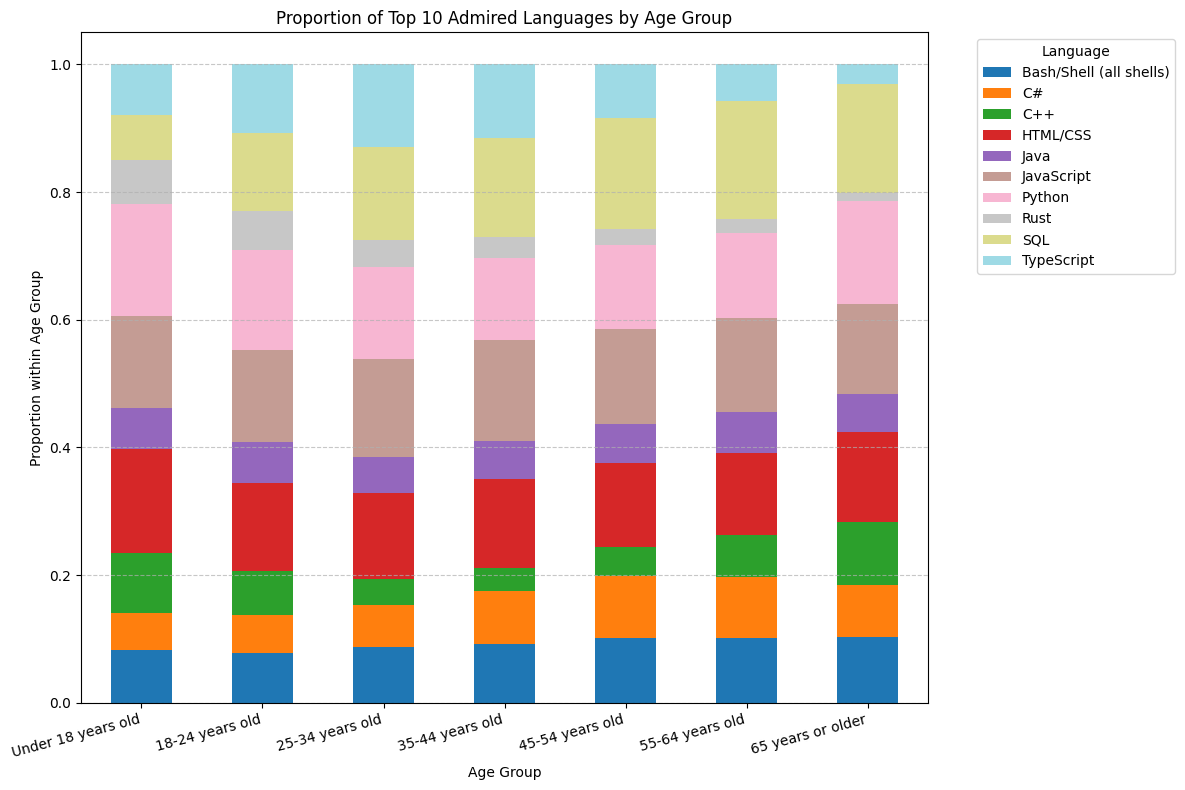

In [13]:
##Write your code here
print("\n--- Generating: Stacked Bar - Proportion of Top 10 Admired Languages by Age ---")

# Define column names
age_col = 'Age'
lang_adm_col = 'LanguageAdmired' # Use LanguageAdmired as per task title

# Check if required columns exist
if age_col in df.columns and lang_adm_col in df.columns:

    # 1. Prepare Data (similar to Task 3.1)
    data_lang_age = df[[age_col, lang_adm_col]].dropna().copy()
    data_lang_age = data_lang_age[data_lang_age[age_col].isin(age_order)]
    data_lang_age[age_col] = pd.Categorical(data_lang_age[age_col], categories=age_order, ordered=True)

    # Parse the multi-value language column
    data_lang_age[lang_adm_col] = data_lang_age[lang_adm_col].str.split(';')
    data_lang_age_exploded = data_lang_age.explode(lang_adm_col)
    data_lang_age_exploded[lang_adm_col] = data_lang_age_exploded[lang_adm_col].str.strip()
    # Remove empty strings that might result from splitting if data isn't clean
    data_lang_age_exploded = data_lang_age_exploded[data_lang_age_exploded[lang_adm_col] != '']


    # Find the overall top 10 most admired languages
    top_10_langs = data_lang_age_exploded[lang_adm_col].value_counts().nlargest(10).index.tolist()
    print(f"\nTop 10 admired languages: {top_10_langs}")

    # Filter the exploded data
    data_lang_age_top10 = data_lang_age_exploded[data_lang_age_exploded[lang_adm_col].isin(top_10_langs)]
    print(f"Using {len(data_lang_age_top10)} entries corresponding to top 10 languages.")

    # 2. Calculate Counts and Proportions
    lang_counts = data_lang_age_top10.groupby([age_col, lang_adm_col], observed=False).size()
    lang_counts_pivot = lang_counts.unstack(fill_value=0)
    lang_counts_pivot = lang_counts_pivot.reindex(age_order) # Ensure age order
    lang_proportions = lang_counts_pivot.apply(lambda x: x / x.sum() if x.sum() > 0 else x, axis=1) # Avoid division by zero

    print("\nProportion of Top 10 Admired Languages within Each Age Group:")
    print(lang_proportions.head())

    # 3. Create the Stacked Bar Chart
    if not lang_proportions.empty and not lang_proportions.isnull().all().all():
        ax = lang_proportions.plot(kind='bar', stacked=True, figsize=(14, 8),
                                   colormap='tab20')

        # 4. Customize the Plot
        plt.title('Proportion of Top 10 Admired Languages by Age Group')
        plt.xlabel('Age Group')
        plt.ylabel('Proportion within Age Group')
        plt.xticks(rotation=15, ha='right')
        plt.legend(title='Language', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout(rect=[0, 0, 0.85, 1])
        plt.show()
    else:
         print("Warning/Error: No data to plot for language proportions.")

else:
    print(f"Stacked chart skipped: Required columns '{age_col}' or '{lang_adm_col}' not found.")

##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


In [ ]:
##Write your code here


### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
